In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as pl
import seaborn as sns
from matplotlib import rcParams
from PIL import Image

from mpl_toolkits.basemap import Basemap
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [21]:
mapdata = np.loadtxt("data/sf_map_copyright_openstreetmap_contributors.txt")
pl.imshow(mapdata, cmap = pl.get_cmap('gray'))
pl.savefig('map.png')

IOError: [Errno 2] No such file or directory: 'data/sf_map_copyright_openstreetmap_contributors.txt'

# crime san fransisco

In [22]:
# Supplied map bounding box:
#    ll.lon     ll.lat   ur.lon     ur.lat
#    -122.52469 37.69862 -122.33663 37.82986
mapdata = np.loadtxt("data/sf_map_copyright_openstreetmap_contributors.txt")
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]

lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)
clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]]


IOError: [Errno 2] No such file or directory: 'data/sf_map_copyright_openstreetmap_contributors.txt'

In [15]:
mapdata

array([[ 0.74901961,  0.78823529,  0.76862745, ...,  0.78431373,
         0.78431373,  0.78431373],
       [ 0.81960784,  0.84313725,  0.8627451 , ...,  0.78431373,
         0.78431373,  0.78431373],
       [ 0.89803922,  0.89803922,  0.89803922, ...,  0.78431373,
         0.78431373,  0.78431373],
       ..., 
       [ 0.78431373,  0.78431373,  0.78431373, ...,  0.78431373,
         0.78431373,  0.78431373],
       [ 0.78431373,  0.78431373,  0.78431373, ...,  0.78431373,
         0.78431373,  0.78431373],
       [ 0.78431373,  0.78431373,  0.78431373, ...,  0.78431373,
         0.78431373,  0.78431373]])

In [19]:
train = pd.read_csv('data/train.csv')

#Get rid of the bad lat/longs
train['Xok'] = train[train.X<-121].X
train['Yok'] = train[train.Y<40].Y
train = train.dropna()
trainP = train[train.Category == 'PROSTITUTION'] #Grab the prostitution crimes
train = train[1:300000] #Can't use all the data and complete within 600 sec :(

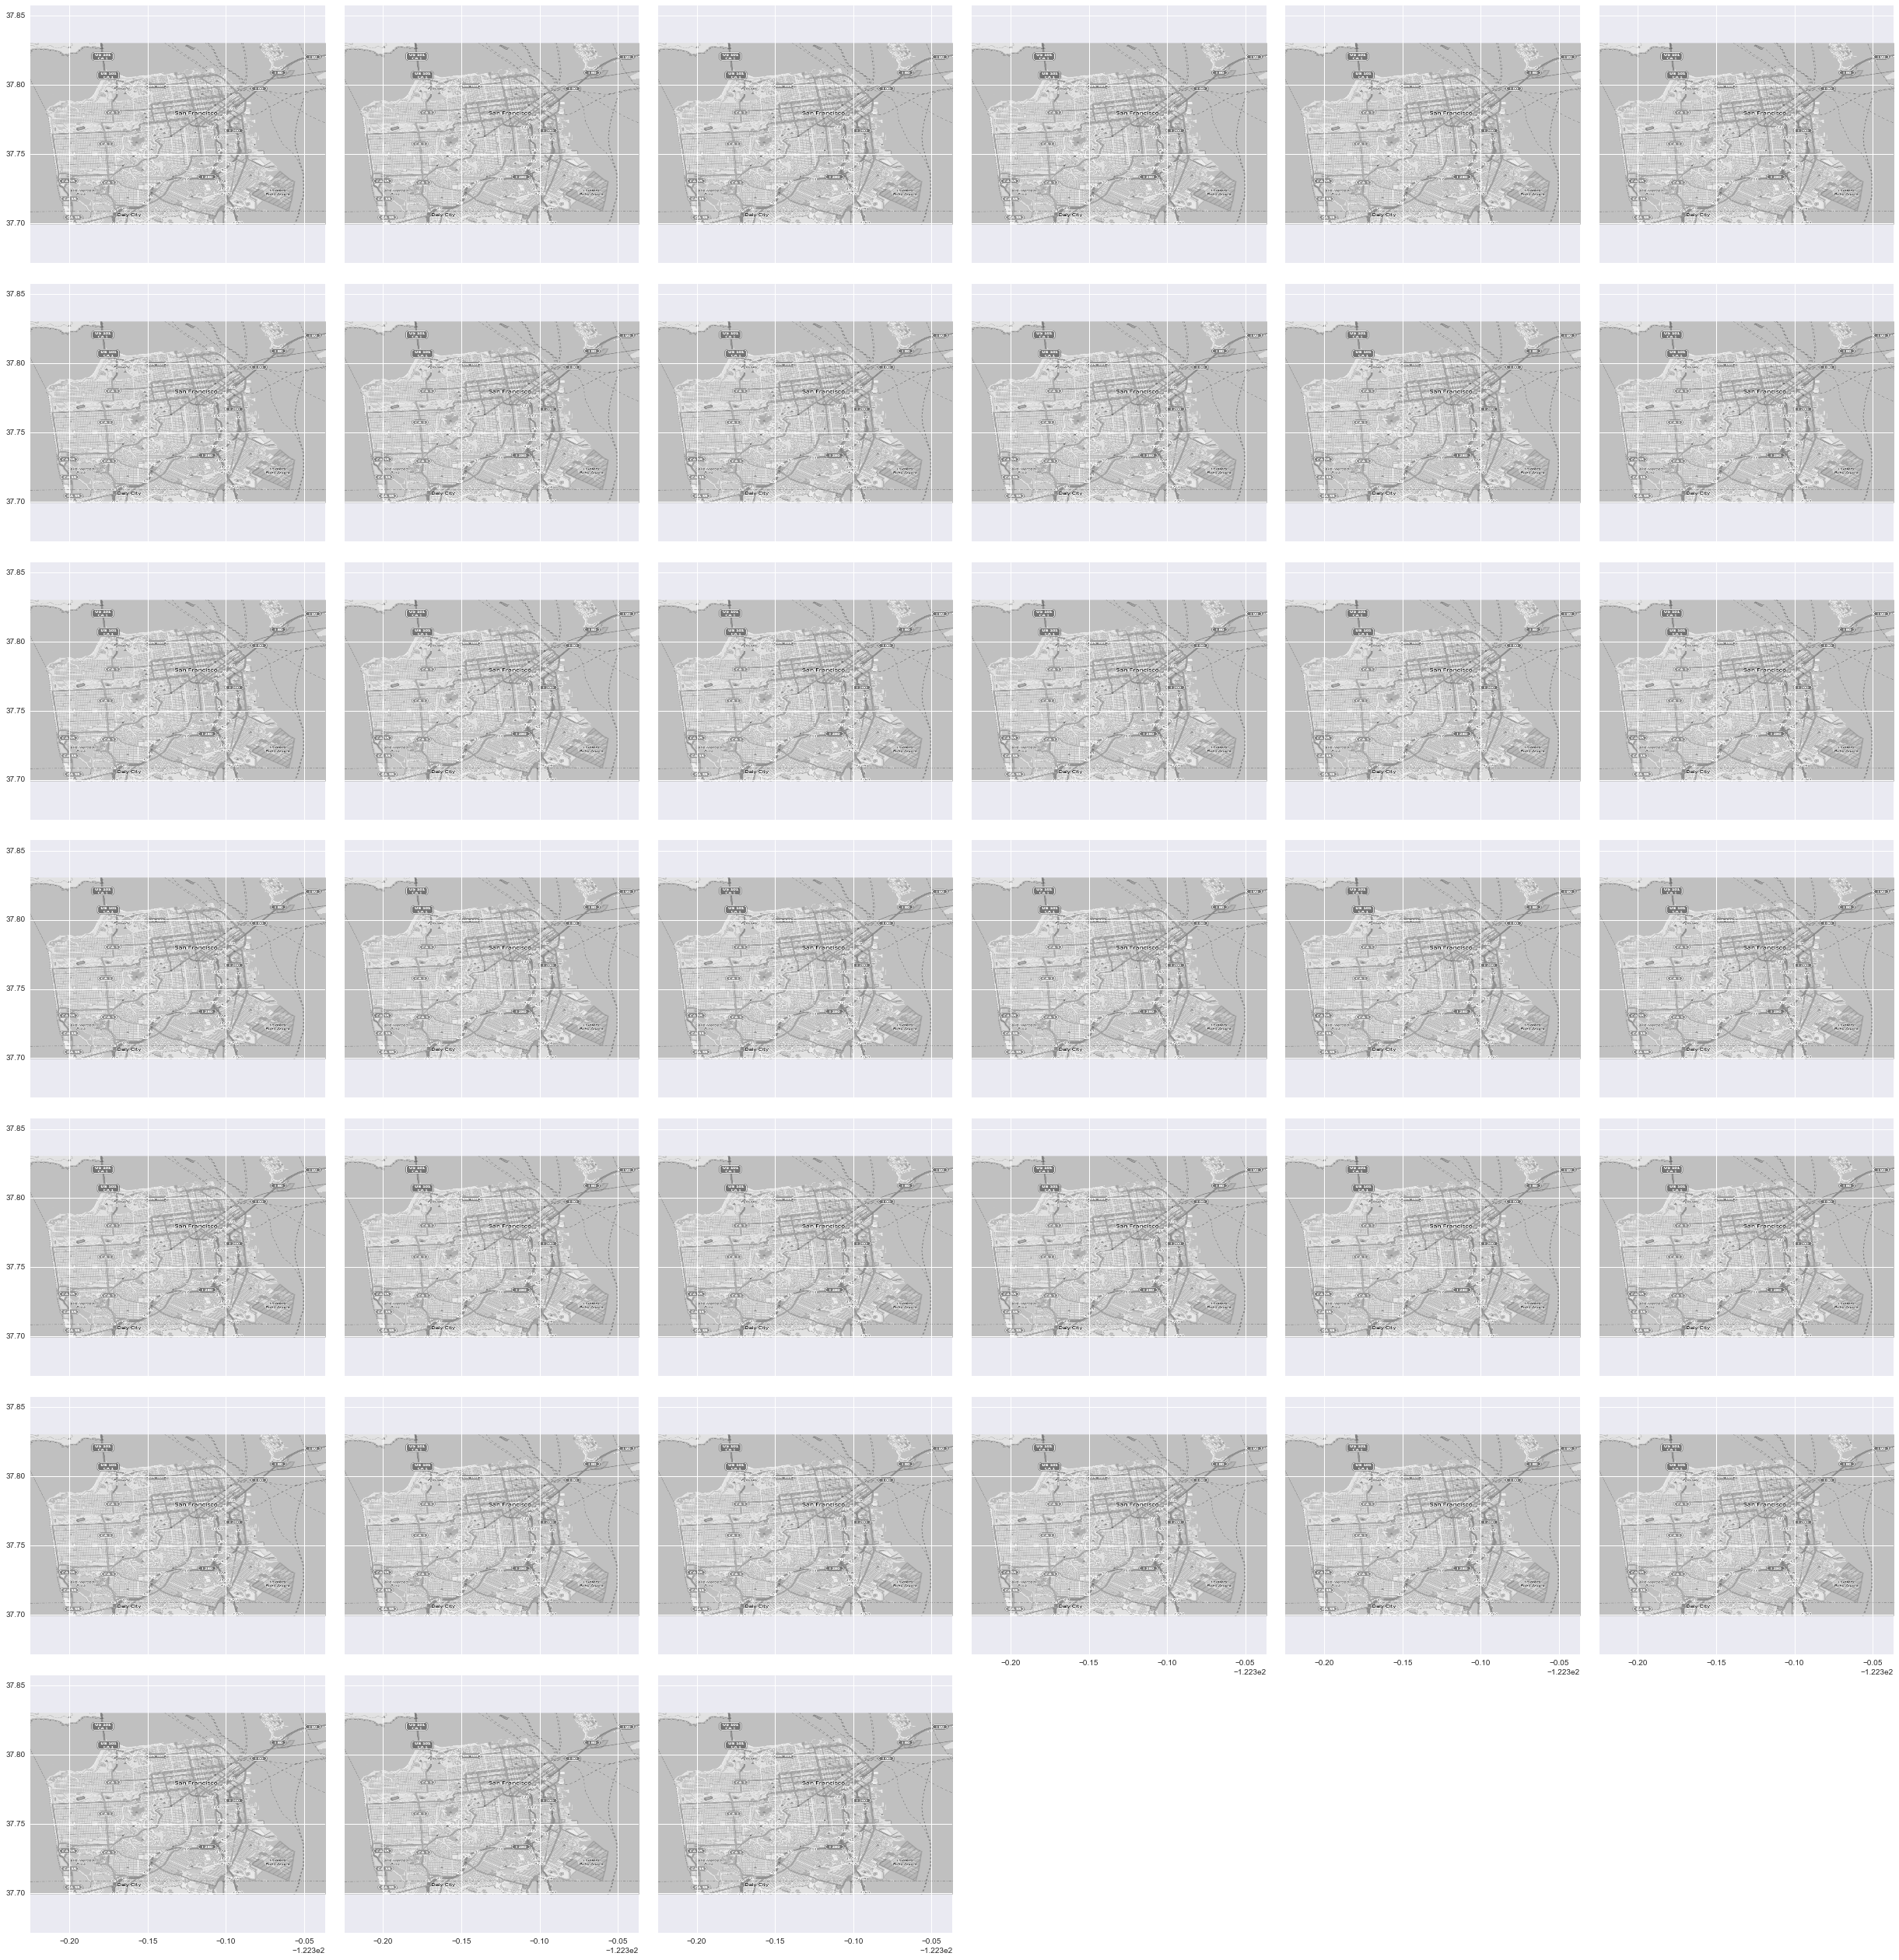

In [20]:
#Seaborn FacetGrid, split by crime Category
g= sns.FacetGrid(train, col="Category", col_wrap=6, size=5, aspect=1/asp)

#Show the background map
for ax in g.axes:
    ax.imshow(mapdata, cmap=pl.get_cmap('gray'), 
              extent=lon_lat_box, 
              aspect=asp)

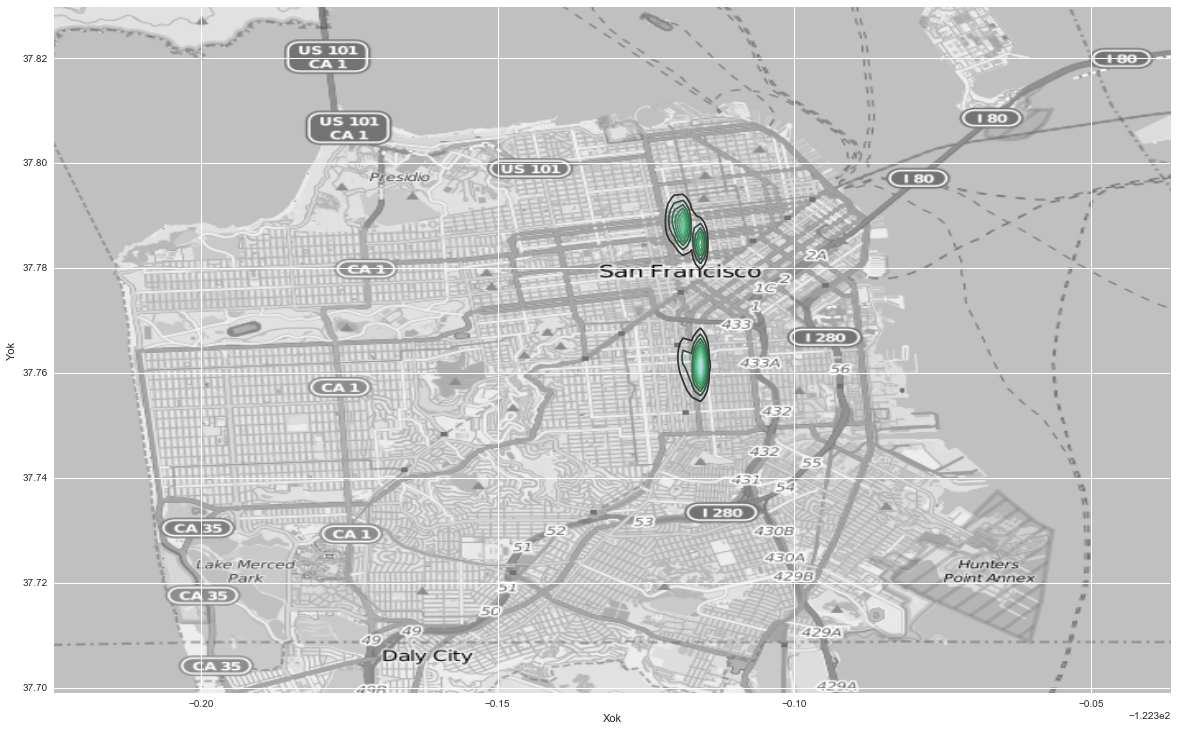

In [21]:
#Kernel Density Estimate plot
#g.map(sns.kdeplot, "Xok", "Yok", clip=clipsize)

#pl.savefig('category_density_plot.png')

#Do a larger plot with prostitution only
pl.figure(figsize=(20,20*asp))
ax = sns.kdeplot(trainP.Xok, trainP.Yok, clip=clipsize, aspect=1/asp)
ax.imshow(mapdata, cmap=pl.get_cmap('gray'), extent=lon_lat_box, aspect=asp)
#pl.savefig('prostitution_density_plot.png')

In [22]:
1/asp

1.1316666666666666

# Just Map

In [2]:
#http://gnperdue.github.io/yak-shaving/osx/python/matplotlib/2014/05/01/basemap-toolkit.html
#http://matplotlib.org/basemap/users/installing.html
#https://basemaptutorial.readthedocs.org/en/latest/basic_functions.html

In [4]:
xl = pd.ExcelFile("./data/donneesBrutesPirateriesLatLon.xlsx")
train = xl.parse("Sheet1")
train.head()
lon_lat_box = (-13, 33, 33, 77)
clipsize = [[-13, 33],[ 33, 77]]

In [5]:
#train.latitude.values

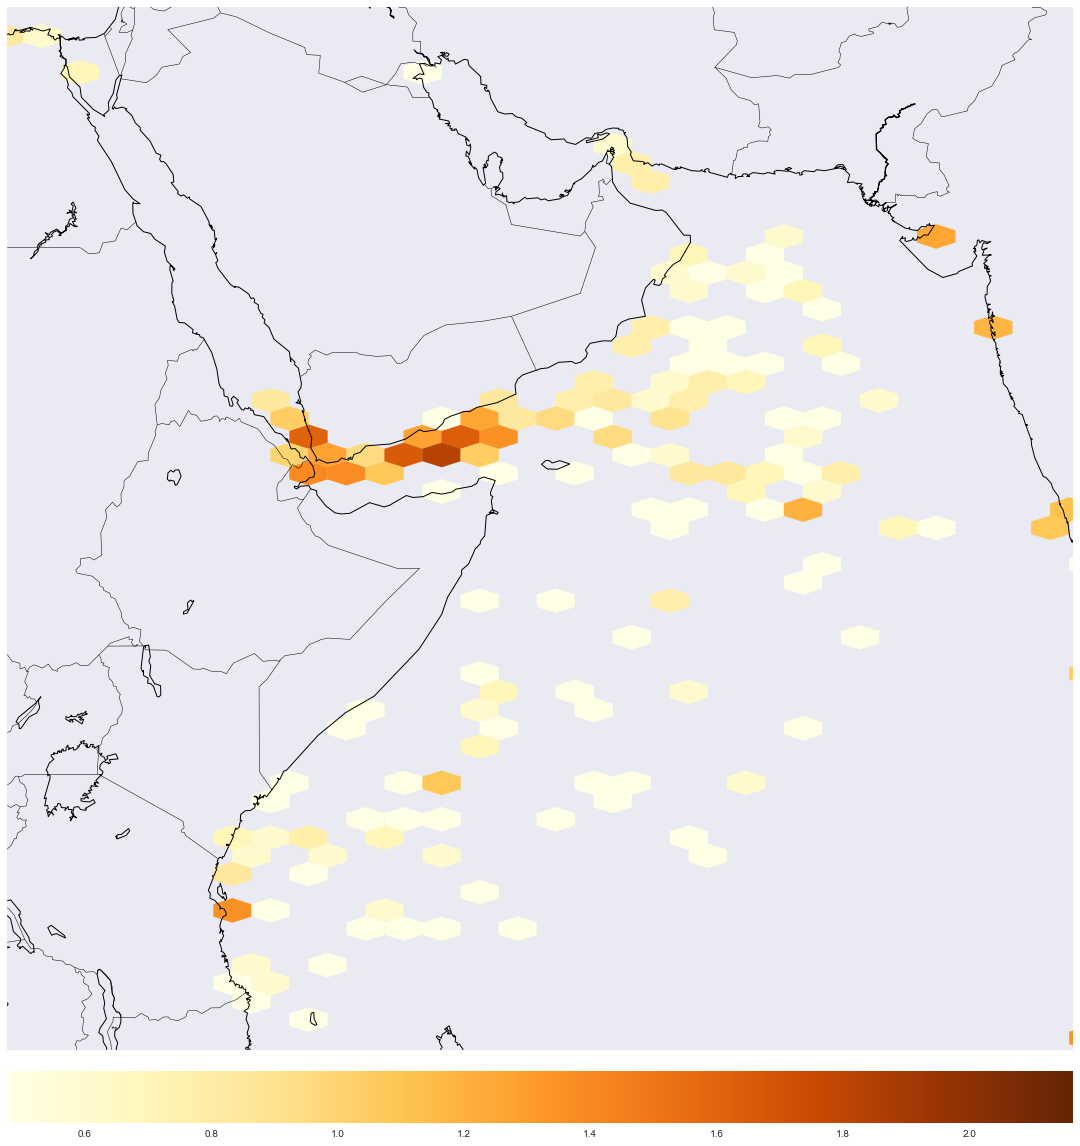

In [39]:
# Set up the basemap and plot the markers.
lats = np.arange(-13, 33, 0.5)
lons = np.arange(30, 77, 0.5)

m = Basemap(projection='cyl',
            llcrnrlon=min(lons), llcrnrlat=min(lats),
            urcrnrlon=max(lons), urcrnrlat=max(lats),
            resolution='l')

#x,y = m(lons,lats)
#u,v, = np.arange(0,51,10), np.arange(0,51,10)
#barbs = m.barbs(x,y,u,v)

#m.kdeplot(train.latitude, train.longitude, clip=clipsize, aspect=1/asp)

pl.figure(0)
#m.fillcontinents()
m.drawcoastlines()
m.drawcountries()
#m.drawstates()

m.hexbin(train.longitude.values,train.latitude.values, gridsize=80, mincnt=2, cmap='YlOrBr', bins='log')
m.colorbar(location='bottom')



#m.contourf(train.latitude.values, train.longitude.values)

rcParams['figure.figsize'] = 20, 20

#m.imshow()
#pl.figure()
#sns.kdeplot(train.latitude, train.longitude, clip=clipsize, aspect=1/asp)
#ax.imshow(m, cmap=pl.get_cmap('gray'), extent=lon_lat_box, aspect=asp)

In [31]:
ax=sns.kdeplot(train.latitude, train.longitude, clip=clipsize, aspect=1/asp,shade=True)
print type(ax)
#ax.imshow(plt.imread('aden.png'))

NameError: name 'asp' is not defined

# Test BAseMAp

In [133]:
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

# read in etopo5 topography/bathymetry.
url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
etopodata = Dataset(url)

topoin = etopodata.variables['ROSE'][:]
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
# shift data so lons go from -180 to 180 instead of 20 to 380.
topoin,lons = shiftgrid(180.,topoin,lons,start=False)

# plot topography/bathymetry as an image.

# create the figure and axes instances.
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# setup of basemap ('lcc' = lambert conformal conic).
# use major and minor sphere radii from WGS84 ellipsoid.
m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=50.,lon_0=-107.,ax=ax)
# transform to nx x ny regularly spaced 5km native projection grid
nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)
# plot image over map with imshow.
im = m.imshow(topodat,cm.GMT_haxby)
# draw coastlines and political boundaries.
m.drawcoastlines()
m.drawcountries()
m.drawstates()
# draw parallels and meridians.
# label on left and bottom of map.
parallels = np.arange(0.,80,20.)
m.drawparallels(parallels,labels=[1,0,0,1])
meridians = np.arange(10.,360.,30.)
m.drawmeridians(meridians,labels=[1,0,0,1])
# add colorbar
cb = m.colorbar(im,"right", size="5%", pad='2%')
ax.set_title('ETOPO5 Topography - Lambert Conformal Conic')
plt.show()

ImportError: No module named netCDF4

In [ ]:
#http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html